<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить модель, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. Имеются данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Подготовка данных

Загрузим данные и посмотрим на них.

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
data_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
data_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Проверим правильность вычисления параметра `rougher.output.recovery` на тренировочных данных.

In [6]:
data_train['rougher.output.recovery']

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [7]:
ror = pd.Series((data_train['rougher.output.concentrate_au'] * (
               data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) /
               (data_train['rougher.input.feed_au'] * (
               data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au'])) * 100)

In [8]:
ror

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64

Найдем MAE между расчетами и значением признака.

In [9]:
mae = mean_absolute_error(ror, data_train['rougher.output.recovery'])
mae

9.73512347450521e-15

Значение MAE очень мало, значит можно сделать вывод, что вычисления проведены верно.

В таблице с тестовыми значениями меньше столбцов, чем в обучающем наборе. Посмотрим, что это за столбцы.

In [10]:
set(data_train.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовых данных отсутствуют характеристики продукта после каждого этапа и ряд расчетных характеристик этапа флотации.

Заполним пропуски в значениях. Поскольку данные упорядочены по дате, а соседние по дате параметры часто схожи (из условия), то заполним каждый пропуск предыдущим в таблице значением.

In [11]:
data_train.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)
data_full.fillna(method='ffill', inplace=True)

В тестовых данных нет целевых признаков, выберем их из полных данных.

In [12]:
target_test = data_full[['rougher.output.recovery', 'final.output.recovery']].loc[data_test.index]

In [13]:
target_test

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078
...,...,...
2017-12-31 19:59:59,95.172585,68.919891
2017-12-31 20:59:59,94.575036,68.440582
2017-12-31 21:59:59,93.018138,67.092759


Познакомились с данными, заполнили пропуски, выбрали целевой признак для тестовых данных.

## Анализ данных

Проанализируем данные. Исследуем изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

In [14]:
def plot_metal(metal):
    my_title = 'Концентрация ' + metal + ' (%)'
    fig, axes = plt.subplots(2, 2, figsize=(12,6))
    fig.suptitle(my_title)
    axes[0, 0].set_title('До очистки')
    axes[0, 0].hist(data_full['rougher.input.feed_' + metal]);
    axes[0, 1].set_title('После флотации')
    axes[0, 1].hist(data_full['rougher.output.concentrate_' + metal]);
    axes[1, 0].set_title('После первичной очистки')
    axes[1, 0].hist(data_full['primary_cleaner.output.concentrate_' + metal]);
    axes[1, 1].set_title('После вторичной очистки')
    axes[1, 1].hist(data_full['final.output.concentrate_' + metal]);

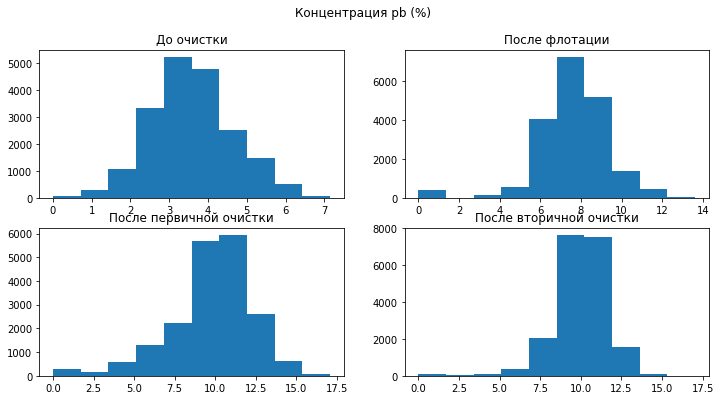

In [15]:
plot_metal('pb')

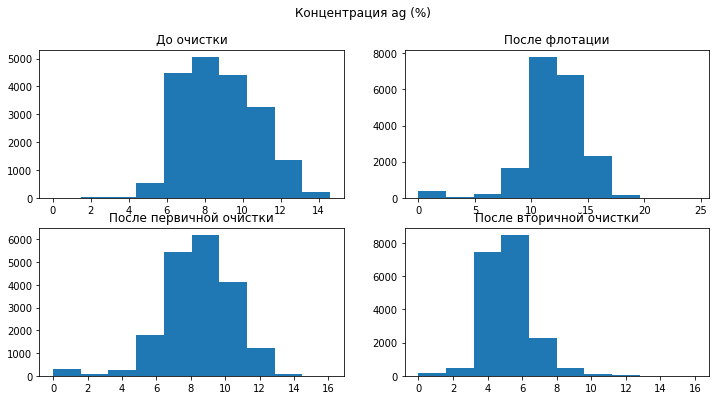

In [16]:
plot_metal('ag')

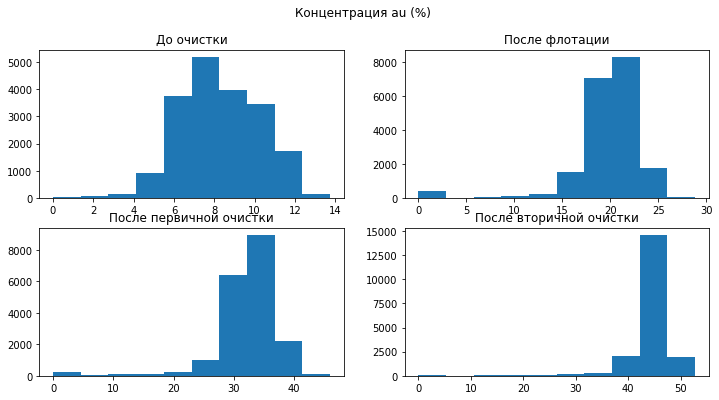

In [17]:
plot_metal('au')

После флотации можно отметить рост концентрации всех металлов. После первичной и вторичной очистки концентрация свинца незначительно увеличивается, концентрация серебра заметно снижается, а концентрация золота, как и ожидается, сильно возрастает.

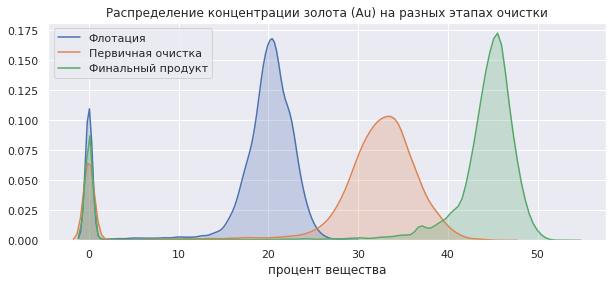

Посмотрим на размеры гранул сырья на обучающей и тестовой выборках.

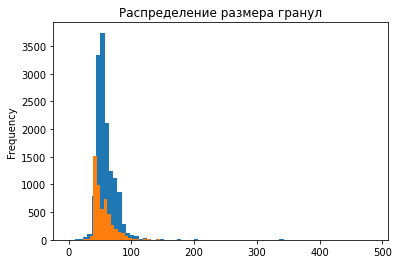

In [18]:
data_train['rougher.input.feed_size'].plot(kind='hist', bins=70)
data_test['rougher.input.feed_size'].plot(kind='hist', bins=70)
plt.title('Распределение размера гранул');

Распределения в целом похожи, в тестовых данных значения несколько меньше, но на качестве модели это не должно сильно сказаться.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

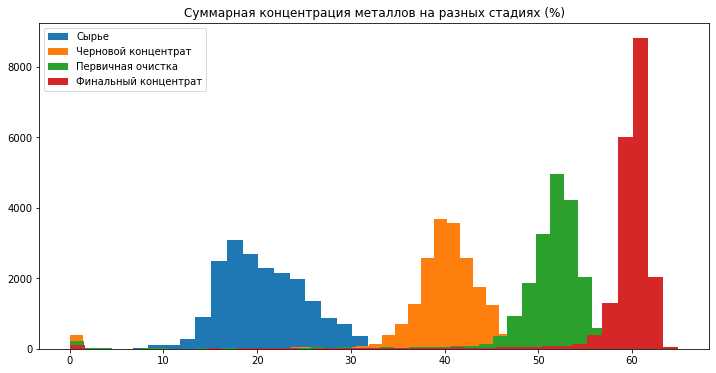

In [19]:
plt.figure(figsize=(12,6))
plt.title('Суммарная концентрация металлов на разных стадиях (%)')
plt.hist(data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_au'] 
         + data_full['rougher.input.feed_ag'], label='Сырье', bins=20)
plt.hist(data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_au'] 
         + data_full['rougher.output.concentrate_ag'], label='Черновой концентрат', bins=40)
plt.hist(data_full['primary_cleaner.output.concentrate_pb'] + data_full['primary_cleaner.output.concentrate_au'] 
         + data_full['primary_cleaner.output.concentrate_ag'], label='Первичная очистка', bins=40)
plt.hist(data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_au'] 
         + data_full['final.output.concentrate_ag'], label='Финальный концентрат', bins=40)
plt.legend();

Между стадиями очистки значительно повышается концентрация металлов в сырье. Похоже, что по данным концентрации можно с большой вероятностью точно сказать, какой этап очистки прошло сырье.

На графике видно, что есть аномалии, когда суммарная концентрация металлов равна нулю. Уберем их из данных.

In [20]:
def drop_indexes(data):
    indexes_rougher = pd.Series(data[data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_au'] 
             + data['rougher.output.concentrate_ag'] == 0].index)
    indexes_primary = pd.Series(data[data['primary_cleaner.output.concentrate_pb'] + data['primary_cleaner.output.concentrate_au'] 
             + data['primary_cleaner.output.concentrate_ag'] == 0].index)
    indexes_final = pd.Series(data[data['final.output.concentrate_pb'] + data['final.output.concentrate_au'] 
             + data['final.output.concentrate_ag'] == 0].index)
    indexes = pd.concat([indexes_rougher, indexes_primary, indexes_final])
    return indexes

In [21]:
data_full.drop(drop_indexes(data_full), inplace=True)
data_train.drop(drop_indexes(data_train), inplace=True)

## Модель

Подготовим данные для модели. `target_test` и `data_test` у нас уже есть. Подготовим тренировочные данные - уберем лишние столбцы и отделим целевой признак.

In [22]:
features_train = data_train[data_test.columns]
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
features_test = data_test

In [23]:
target_test.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078


Напишем функцию для вычисления sMAPE.

In [24]:
def smape(target, predictions):
    predictions = pd.DataFrame(data=predictions, columns=['rougher.output.recovery', 'final.output.recovery'],
                              index=target.index)
    smape_r = ((abs(target['rougher.output.recovery'] - predictions['rougher.output.recovery'])) / 
              ((abs(target['rougher.output.recovery']) + abs(predictions['rougher.output.recovery'])) / 2)
              * 100).sum() / target.shape[0]
    smape_f = ((abs(target['final.output.recovery'] - predictions['final.output.recovery'])) / 
              ((abs(target['final.output.recovery']) + abs(predictions['final.output.recovery'])) / 2)
              * 100).sum() / target.shape[0]
    smape_t = smape_r * 0.25 + smape_f * 0.75
    return smape_t

In [25]:
score = make_scorer(smape)

Оценим значение sMAPE для константной модели.

In [26]:
predict_const = [[target_train['rougher.output.recovery'].median(), 
                              target_train['final.output.recovery'].median()] for i in range(target_train.shape[0])]

In [27]:
smape(target_train, predict_const)

9.44195330668461

Обучим разные модели и оценим их качество с помощью кросс-валидации.

In [28]:
model = LinearRegression()
cross_score = cross_val_score(model, features_train, target_train, cv=5, scoring=score)
cross_score.mean()

10.02932338763631

In [29]:
min_cross = 20
best_model = None
for depth in range(1, 20):    
    model = DecisionTreeRegressor(max_depth=depth, random_state=25)
    cross_score = cross_val_score(model, features_train, target_train, cv=5, scoring=score)
    if cross_score.mean() < min_cross:
        min_cross = cross_score.mean()
        best_model = model
print(min_cross)
print(best_model)

8.958613458934334
DecisionTreeRegressor(max_depth=1, random_state=25)


In [30]:
min_cross = 20
best_model = None
for depth in range(1, 10, 2):
    for est in range(10, 51, 10):
        model = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=25)
        cross_score = cross_val_score(model, features_train, target_train, cv=5, scoring=score)
        if cross_score.mean() < min_cross:
            min_cross = cross_score.mean()
            best_model = model
print(min_cross)
print(best_model)

8.637368109621374
RandomForestRegressor(max_depth=3, n_estimators=50, random_state=25)


Наилучший результат показал случайный лес с параметрами max_depth=3, n_estimators=50. Эту модель и возьмем. Проверим ее на тестовых данных.

In [31]:
model = RandomForestRegressor(max_depth=3, n_estimators=50, random_state=25)
model.fit(features_train, target_train)
predicted = model.predict(features_test)
smape(target_test, predicted)

9.159207751606058

Получили значение sMAPE хоть и незначительно, но лучше значения константной модели.